#### unit8 인구 구조를 다양한 형태로 시각화하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

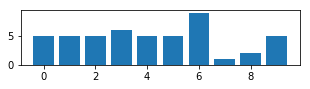

In [2]:
# 막대그래프 (X,Y)
plt.figure(figsize=(5,1))
plt.bar(np.arange(10), np.random.randint(1,10,size=10))

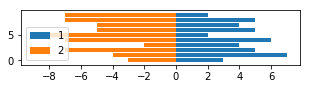

In [3]:
plt.figure(figsize=(5,1))
plt.barh(np.arange(10), np.random.randint(1,10,size=10), label='1')
plt.barh(np.arange(10), -np.random.randint(1,10,size=10), label='2')
plt.legend()
# barh -> 수평 막대그래프

In [4]:
# p.155
df = pd.read_csv('gender.csv', encoding='cp949')
df = df.replace(',', '', regex = True)
df.shape

(3842, 207)

- 특정 도시(영암)의 여성과 남성의 나이별 인구수 대조
- 컬럼 위치 찾기 : 남 0세 ~ 남90세, 여 0세 ~ 여 90세
- 0세:10명 1세:20명.... 도시에서 모두 누적 > 막대 그래프로 표현

In [5]:
max_age = 90
man_0 = '2019년05월_남_0세'
woman_0 = '2019년05월_여_0세'
city = '영암군'
columns = list(df.columns) # df.columns 1행 = columns
type(list(df.columns))
man_0_index = columns.index(man_0) # man_0_index : 남 0세 N 열
woman_0_index = columns.index(woman_0) # man_0_index : 여 0세 N 열
print(man_0_index, woman_0_index)
columns[man_0_index], columns[man_0_index + max_age]
columns[woman_0_index], columns[woman_0_index + max_age]

3 106


('2019년05월_여_0세', '2019년05월_여_90세')

In [6]:
data = np.array(df)
area = data[:, 0]
area # 1열 : 주소
for i in range(len(area)):
    if city in area[i]:
        print(i, area[i])
        city_row_index = i
city_row_index

2979 전라남도 영암군 (4683000000)
2980 전라남도 영암군 영암읍(4683025000)
2981 전라남도 영암군 삼호읍(4683025300)
2982 전라남도 영암군 삼호읍서부출장소(4683025400)
2983 전라남도 영암군 덕진면(4683031000)
2984 전라남도 영암군 금정면(4683032000)
2985 전라남도 영암군 신북면(4683033000)
2986 전라남도 영암군 시종면(4683034000)
2987 전라남도 영암군 도포면(4683035000)
2988 전라남도 영암군 군서면(4683036000)
2989 전라남도 영암군 서호면(4683037000)
2990 전라남도 영암군 학산면(4683038000)
2991 전라남도 영암군 미암면(4683039000)


2991

In [7]:
city_data = data[city_row_index]
city_man = city_data[man_0_index:man_0_index +  max_age]
city_woman = city_data[woman_0_index:woman_0_index +  max_age]
city_man = city_man.astype(np.int)
city_woman = city_woman.astype(np.int)
city_man.shape, city_woman.shape

((90,), (90,))

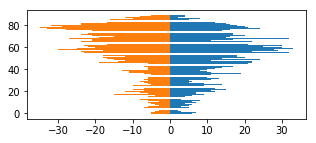

In [8]:
plt.figure(figsize=(5,2))
m = plt.barh(np.arange(len(city_man)), city_man)
m = plt.barh(np.arange(len(city_woman)), -city_woman)


In [9]:
city = '영암' # 이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크(True)검색
is_contain = []
for i in range(len(area)):
    is_contain.append(city in area[i])
    
is_contain[0], is_contain[-1]
np.mean(is_contain)
city_data = data[is_contain]
city_data.shape

(13, 207)

In [10]:
city_data

array([['전라남도 영암군 (4683000000)', '27837', '27837', ..., 8, 10, '23'],
       ['전라남도 영암군 영암읍(4683025000)', '4194', '4194', ..., 1, 2, '1'],
       ['전라남도 영암군 삼호읍(4683025300)', '7260', '7260', ..., 1, 0, '3'],
       ...,
       ['전라남도 영암군 서호면(4683037000)', '959', '959', ..., 0, 2, '2'],
       ['전라남도 영암군 학산면(4683038000)', '1506', '1506', ..., 0, 3, '2'],
       ['전라남도 영암군 미암면(4683039000)', '1209', '1209', ..., 0, 1, '1']],
      dtype=object)

In [27]:
city_man = city_data[:, man_0_index:man_0_index+max_age].astype(np.int)
city_woman = city_data[:, woman_0_index:woman_0_index+max_age].astype(np.int)
city_man.shape, city_woman.shape #(영암 포함13개/행, 90세/열)
#man_0_index # 남 0세
city_man = np.sum(city_man, axis=0) # 행기준으로 더해라, 결과 90개 데이터
city_woman = np.sum(city_woman, axis=0)
city_man.shape

(90,)

(array([ 316,  380,  392,  422,  416,  422,  438,  394,  460,  422,  446,
         412,  478,  382,  460,  518,  458,  582,  674,  680,  632,  644,
         656,  614,  608,  538,  536,  462,  390,  412,  376,  430,  508,
         492,  498,  616,  786,  786,  790,  860,  724,  788,  770,  834,
         862,  968, 1088,  974, 1084,  966, 1130,  992, 1034, 1148, 1020,
        1014, 1160,  992, 1170, 1018,  912,  964,  830,  756,  816,  588,
         630,  616,  614,  654,  604,  594,  564,  428,  546,  422,  586,
         604,  438,  488,  414,  358,  326,  266,  260,  210,  182,  124,
          78,   82]),
 array([370, 410, 346, 366, 400, 420, 436, 406, 464, 384, 390, 404, 400,
        346, 356, 424, 438, 506, 574, 618, 536, 546, 446, 450, 398, 380,
        418, 406, 348, 396, 390, 384, 420, 452, 454, 522, 538, 566, 554,
        564, 518, 534, 500, 574, 570, 638, 680, 744, 716, 716, 734, 780,
        726, 720, 810, 738, 856, 856, 972, 944, 840, 780, 818, 732, 814,
        670, 680, 652

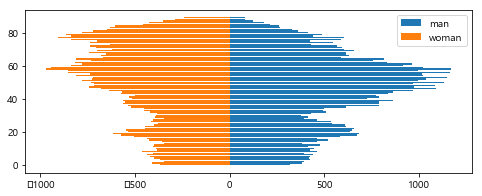

In [38]:
plt.figure(figsize=(8,3))
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()
city_man, city_woman

In [45]:
n = plt.pie( [np.sum(city_man), np.sum(city_woman)], labels==['M', 'W'] ), autopct='%.1f%%', colors=colors, explore=(0,0.1)


SyntaxError: can't assign to function call (<ipython-input-45-5e62c6d0a0cf>, line 1)

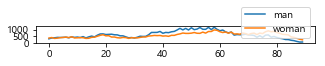

In [50]:
plt.figure(figsize=(5,0.3))
p = plt.plot(city_man, label='man')
p = plt.plot(city_woman, label='woman')
p = plt.legend()

<BarContainer object of 90 artists>

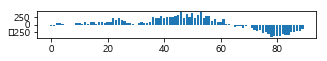

In [49]:
#p144 남녀 인구의 차이 
plt.figure(figsize=(5,0.5))
plt.bar(np.arange(len(city_man)), city_man - city_woman)

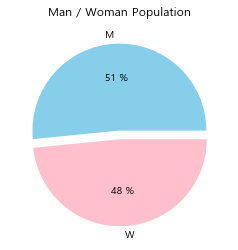

In [51]:
plt.title('Man / Woman Population')
colors = ['skyblue', 'pink']
n = plt.pie([np.sum(city_man),np.sum(city_woman)]
            , labels=['M', 'W'],autopct='%d %%',colors=colors, explode=(0, 0.1))

##### unit 9

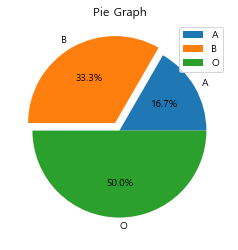

In [37]:
# p.130
plt.rc('font', family='Malgun Gothic')
color = ['darkmagenta', 'deeppink', 'pink']
plt.title("Pie Graph")
n = plt.pie([10,20,30], labels=['A', 'B', 'O'], autopct='%.1f%%', explode=(0,0.1,0))
n = plt.legend()

1. plot(x) plot(x,y) 선
- hist(x) 히스토그램
- boxplot(x) 박스 : 분포
- bar(x, y) barh(x,y) 막대그래프
- pie(x)
- sactter(x,y) 산점도

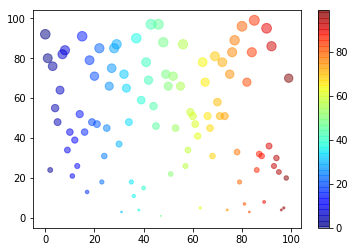

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#p.144 산점도(scatter) 산개, 점 점, 그림 도 
# s(size), c(color)
color=['red', 'green', 'black', 'gold']
color='blue'
y = np.random.randint(0, 100, size=100)
n = plt.scatter(np.arange(len(y)), y, s=y,
               c=range(len(y)), cmap='jet', alpha=0.5)
n = plt.colorbar()
